In [1]:
import numpy    as np
from numpy.testing._private.utils import decorate_methods
import pandas   as pd
import seaborn  as sb
import matplotlib.pyplot as plt
import sklearn  as skl
import time

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\ai_nov21-main\ai_nov21\Chapter 2\11. Data Enhancement\data\london_merged.csv')
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


<AxesSubplot:>

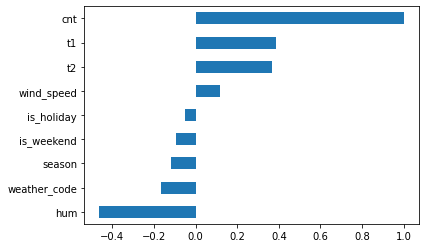

In [5]:
df.corr()['cnt'].sort_values().plot.barh()

<AxesSubplot:>

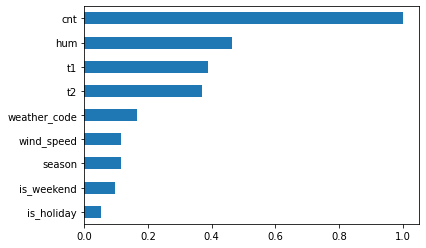

In [6]:
df.corr()['cnt'].abs().sort_values().plot.barh()

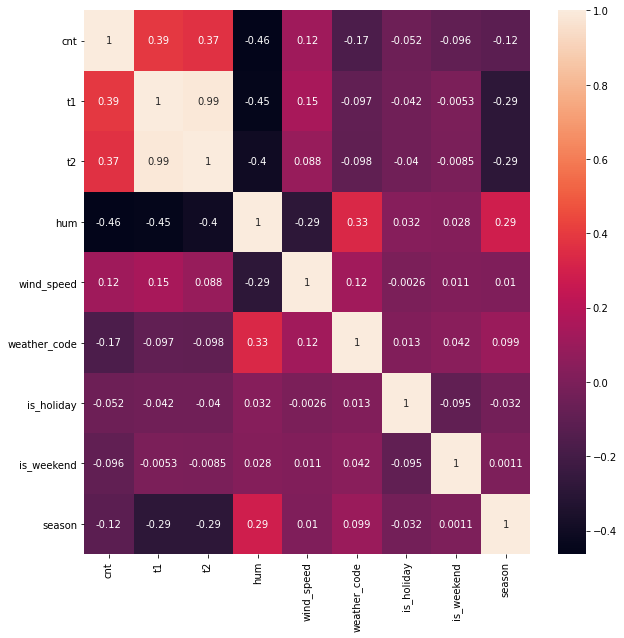

In [7]:
corrMatrix = df.corr()
plt.figure(figsize=(10,10))
sb.heatmap(corrMatrix, annot=True)
plt.show()

correlation between t1 and t2 is high. means that less information is going to get

In [8]:
df['new_t1'] = df['t1'].apply(lambda row : row * (9/5) + 32)
df['new_t2'] = df['t2'].apply(lambda row : row* (9/5) + 32)

coverting temperature celsius to fahrenit to generate new features

In [9]:
df.drop(['t1','t2','timestamp'], axis=1, inplace=True)

In [14]:
y = df['cnt']
x = df.drop(['cnt'], axis=1)
print(x.shape)
print(y.shape)

(17414, 8)
(17414,)


In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [18]:
x_new = SelectKBest(k=4).fit_transform(x, y)
x_new.shape

(17414, 4)

In [24]:
x_new2 = f_regression(x,y)
x_new2

(array([4748.49004575,  238.71856992,  497.27753101,   46.66201574,
         163.66600716,  238.24023476, 3100.80204283, 2745.13300708]),
 array([0.00000000e+000, 1.69510580e-053, 1.22928786e-108, 8.71373613e-012,
        2.63475543e-037, 2.14826898e-053, 0.00000000e+000, 0.00000000e+000]))